In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# carga de datos
iris = datasets.load_iris()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# crea dataframe, tomamos las caract. del dataset, asignamos posicion 
#y creamos el dataset

data=pd.DataFrame({
    'sepal length':iris.data[:,0], 
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'target':iris.target
})
data.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
# imprime las etiquetas de target
print('TARGET: ', iris.target_names)

# imprime las características del dataset
print('CARACT : ', iris.feature_names)

TARGET:  ['setosa' 'versicolor' 'virginica']
CARACT :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


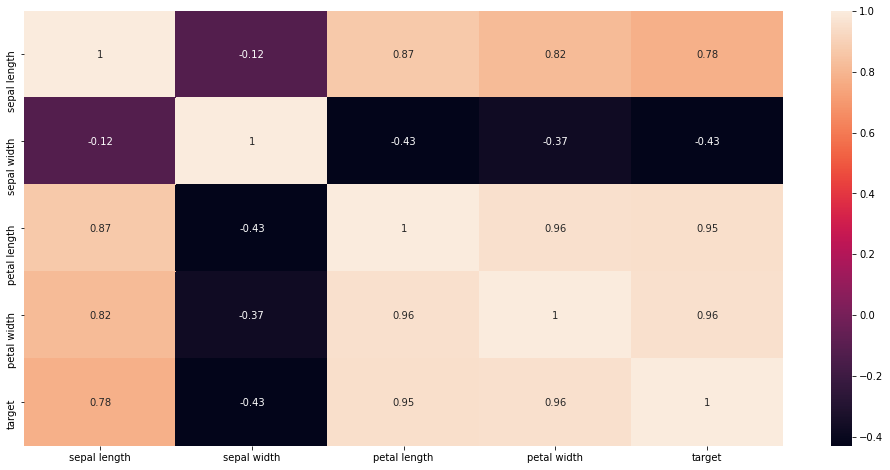

In [ ]:
# creamos matriz de correlación
import matplotlib.pyplot as plt

plt.figure(figsize = (17,8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

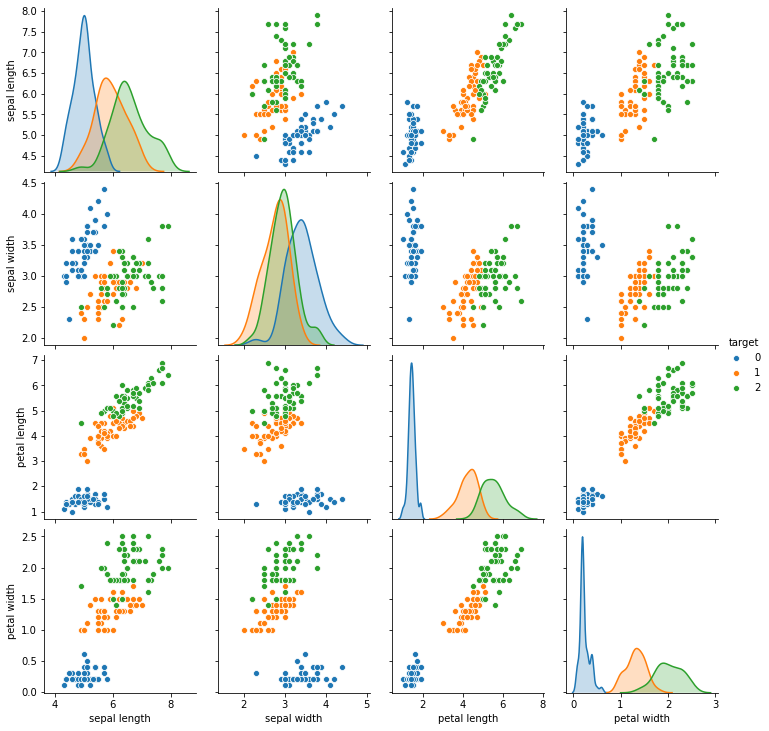

In [ ]:
sns.pairplot(data, hue = 'target', vars = 
  ['sepal length', 'sepal width', 'petal length', 'petal width']
)

En el diagrama anterior podemos observar que los datos se agupan dependiendo del valor de target, esto indica que podemos aplicar el modelo de "vecinos mas cercanos" para una mejor presicion del modelo

In [ ]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

#dividimos el dataset: X contiene los atributos, Y contiene las etiquetas
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['target']

#dividiremos nuestro dataset en divisiones de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#Escalado de funciones
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Entrenamiento
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("PRESICION: ", knn.score(X_test, y_test))

PRESICION:  0.9


Matriz de confusión sin normalizar
[[9 0 0]
 [0 8 6]
 [0 0 7]]
Matriz de confusión con datos normalizados
[[1.   0.   0.  ]
 [0.   0.57 0.43]
 [0.   0.   1.  ]]


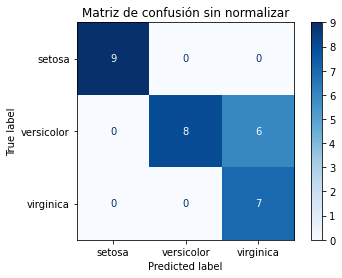

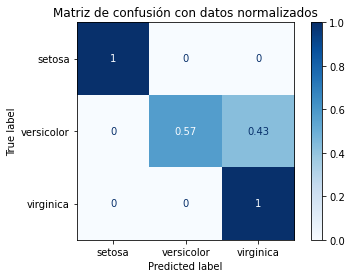

In [ ]:
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix

class_names = iris.target_names

# Crea modelo clasficador de tipo support vector classifier
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
np.set_printoptions(precision=2)

# Arma gráfico con datos sin normalizar y otro con datos normalizados
titles_options = [("Matriz de confusión sin normalizar", None),
                  ("Matriz de confusión con datos normalizados", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Como vemos, la presicion es bastate alta, esto es explicable, ya que como vimos en la etapa de exploracion, los datos estan demasiados agrupados dependiendo el valor de target. Cada valor de target tiene sus propias caracteristicas segun la columna. Podriamos decir que las columnas de longitud del sépalo, ancho de separación, longitud de pétalo y	ancho de pétalo son totalmente distintas segun la clase de la iris (Setosa, Versicolour, Virginica).


Aunque el algoritmo funcionó muy bien, no podemos esperar los mismos resultados con todas las aplicaciones del algoritmo, ya que KNN no siempre funciona tan bien con mas de dos categorias dentro de target


In [ ]:
#Comparación de la tasa de error con el valor K
import numpy as np

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Promedio de error')

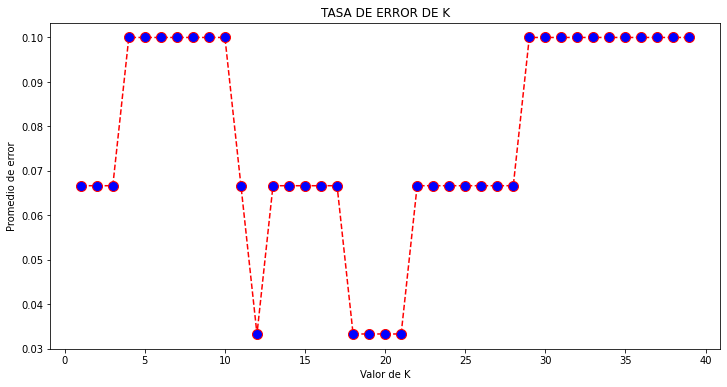

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('TASA DE ERROR DE K')
plt.xlabel('Valor de K')
plt.ylabel('Promedio de error')

In [ ]:
import numpy as np
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Transformamos las clases que para tenga una salida binaria
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Añade características con "ruido" para sumar dificultad a la clasificación
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# divide set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# crea modelo clasificador
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

# entrena modelo
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcula la curva ROC y su área para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el "micro-promedio" de la curva y su área
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'abajo a la derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


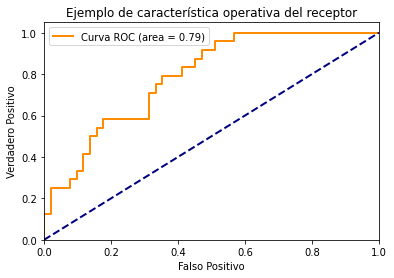

In [ ]:
# Configura gráfico
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Ejemplo de característica operativa del receptor')
plt.legend(loc="abajo a la derecha")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# utiliza sólo 1 característica
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Divide set de datos en subconjuntos de entrenamiento y testing
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Divide variable target en subconjuntos de entrenamiento y testing
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Crea modelo de tipo regresión lineal
regr = linear_model.LinearRegression()

# Entrena modelo con datos de entrenamiento
regr.fit(diabetes_X_train, diabetes_y_train)

# Hace predicciones con datos de testing
diabetes_y_pred = regr.predict(diabetes_X_test)

# Calcula error cuadrático medio
print('* Error cuadrático medio (Mean squared error): %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Calcula el coeficiente de determinación (r2)
print('* Coeficiente de determinacion: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

* Error cuadrático medio (Mean squared error): 2548.07
* Coeficiente de determinacion: 0.47
